Rami, Nicola Srour (2025)

Title: One year American dataset, gradient descent

In [ ]:
# import needed libraries
import pandas as pd
import sklearn.model_selection

In [ ]:
df = pd.read_csv("E-commerce Dataset.csv")
df.head(3)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card


In [ ]:
# remove not needed columns
df = df.drop(['Customer_Id'], axis=1)
# delete duplicates
df = df.drop_duplicates()
# remove nulls
df = df.dropna()
df.head(3)

,Order_Date,Time,Aging,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card


In [ ]:
# turn time and order date columns to numeric and date type data
df['Time'] = pd.to_datetime(df['Time']).astype('int64')
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

<ipython-input-18-f2938bb18ffb>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).astype('int64')


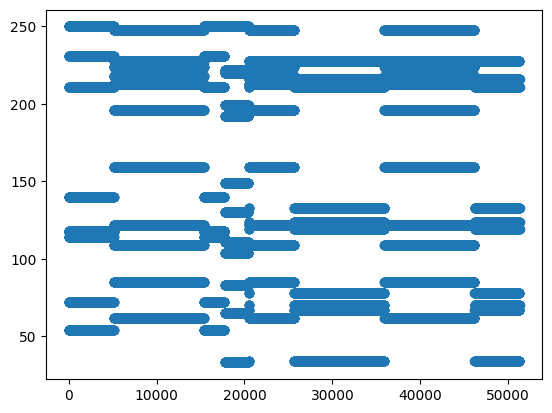

In [ ]:
# use scatter plot to idnetify outliers to remove them
import matplotlib.pyplot as plt

plt.scatter(df.index, df['Sales'])
plt.show()

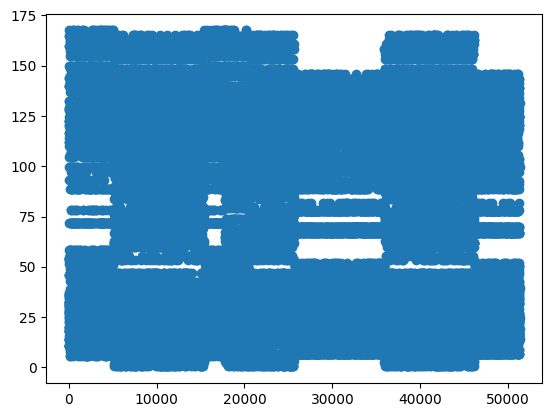

In [ ]:
plt.scatter(df.index, df['Profit'])
plt.show()

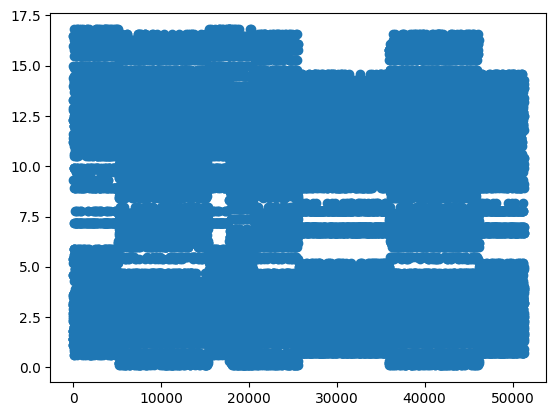

In [ ]:
plt.scatter(df.index, df['Shipping_Cost'])
plt.show()

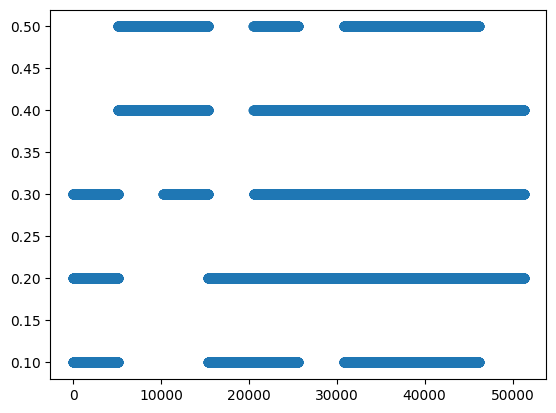

In [ ]:
plt.scatter(df.index, df['Discount'])
plt.show()

In [ ]:
# check the number of unique values and later what are they to know which can be manually encoded
uniquegender = df['Gender'].nunique()
uniquedevtyp = df['Device_Type'].nunique()
uniquecuslog = df['Customer_Login_type'].nunique()
uniquecategory = df['Product_Category'].nunique()
uniqueproduct = df['Product'].nunique()
uniqueorder = df['Order_Priority'].nunique()
uniquepayemntmethod = df['Payment_method'].nunique()
print(uniquegender, uniquedevtyp, uniquecuslog, uniquecategory, uniqueproduct, uniqueorder, uniquepayemntmethod)

2 2 4 4 42 4 5


In [ ]:
uniquegender = df['Gender'].unique()
uniquedevtyp = df['Device_Type'].unique()
uniquecuslog = df['Customer_Login_type'].unique()
uniquecategory = df['Product_Category'].unique()
uniqueorder = df['Order_Priority'].unique()
uniquepayemntmethod = df['Payment_method'].unique()

print(uniquegender, uniquedevtyp, uniquecuslog, uniquecategory, uniqueorder, uniquepayemntmethod)

['Female' 'Male'] ['Web' 'Mobile'] ['Member' 'Guest' 'New ' 'First SignUp'] ['Auto & Accessories' 'Fashion' 'Electronic' 'Home & Furniture'] ['Medium' 'Critical' 'High' 'Low'] ['credit_card' 'money_order' 'e_wallet' 'debit_card' 'not_defined']


In [ ]:
# turn cateogrise to numbers
df['Gender'] = df['Gender'].replace({'Female':1,'Male':2})
df['Device_Type'] = df['Device_Type'].replace({'Web':1, 'Mobile':2})
df['Customer_Login_type'] = df['Customer_Login_type'].replace({'Member':1,'Guest':2, 'New ':3,'First SignUp':4})
df['Product_Category'] = df['Product_Category'].replace({'Auto & Accessories':1, 'Fashion':2, 'Electronic':3, 'Home & Furniture':4})
df['Order_Priority'] = df['Order_Priority'].replace({'Medium':1,'Critical':2, 'High':3,'Low':4})
df['Payment_method'] = df['Payment_method'].replace({'credit_card':1, 'money_order':2, 'e_wallet':3, 'debit_card':4, 'not_defined':5})
df.head(3)

<ipython-input-25-7caf85b88d2d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female':1,'Male':2})
<ipython-input-25-7caf85b88d2d>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Device_Type'] = df['Device_Type'].replace({'Web':1, 'Mobile':2})
<ipython-input-25-7caf85b88d2d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future beh

,Order_Date,Time,Aging,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,1743764193000000000,8.0,1,1,1,1,Car Media Players,140.0,1.0,0.3,46.0,4.6,1,1
1,2018-07-24,1743799297000000000,2.0,1,1,1,1,Car Speakers,211.0,1.0,0.3,112.0,11.2,1,1
2,2018-11-08,1743755929000000000,8.0,1,1,1,1,Car Body Covers,117.0,5.0,0.1,31.2,3.1,2,1


In [ ]:
# use lable encoder on the remaining columns that need encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Product'] = encoder.fit_transform(df['Product'])
df['Order_Date'] = encoder.fit_transform(df['Order_Date'])
df.head(3)

,Order_Date,Time,Aging,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,1,1743764193000000000,8.0,1,1,1,1,7,140.0,1.0,0.3,46.0,4.6,1,1
1,201,1743799297000000000,2.0,1,1,1,1,10,211.0,1.0,0.3,112.0,11.2,1,1
2,303,1743755929000000000,8.0,1,1,1,1,5,117.0,5.0,0.1,31.2,3.1,2,1


In [ ]:
# split the data to train the model
x = df.drop(['Gender'], axis=1)
y = df['Gender']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y)
print("df:", df.shape)
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

df: (51282, 15)
x_train: (38461, 14)
y_train: (38461,)
x_test: (12821, 14)
y_test: (12821,)


In [ ]:
from sklearn.linear_model import SGDClassifier
parameters_gb = {'alpha':[0.0001, 0.001], 'max_iter':[500, 1000],
                 'tol': [ 0.001, 0.01]}
model_gb_tunned = sklearn.linear_model.SGDClassifier()
clf_gb_tunned = sklearn.model_selection.RandomizedSearchCV(model_gb_tunned, parameters_gb,
                                                           scoring = 'accuracy',n_jobs=-1,n_iter=5)

clf_gb_tunned.fit(x_train, y_train)
print(clf_gb_tunned.best_score_)
print(clf_gb_tunned.best_params_)

0.5283529055967906
{'tol': 0.001, 'max_iter': 1000, 'alpha': 0.001}


In [ ]:
y_pred = clf_gb_tunned.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5526090008579674


Dataset Reference:
Menekse. M, (2023), E-commerce Dataset, Kaggle, Available at: https://www.kaggle.com/datasets/mervemenekse/ecommerce-dataset, (Accessed: 04/04/2025)